In [ ]:
import pandas as pd
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r"Multivariate_final_data_set.xlsx")

In [ ]:
df=df.iloc[: , 0:]

In [ ]:
df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,client_catg,region,creation_date,target
0,train_Client_100032,2017-02-24,11,393848,0,203,9,1,781,0,0,0,3844,4625,8,ELEC,11,308,2012-07-11 00:00:00,1
1,train_Client_100032,2016-06-21,11,393848,0,203,9,1,382,0,0,0,3462,3844,4,ELEC,11,308,2012-07-11 00:00:00,1
2,train_Client_100032,2018-10-26,11,393848,0,203,9,1,373,0,0,0,6032,6405,4,ELEC,11,308,2012-07-11 00:00:00,1
3,train_Client_100032,2018-06-21,11,393848,0,203,9,1,328,0,0,0,5704,6032,4,ELEC,11,308,2012-07-11 00:00:00,1
4,train_Client_100032,2018-02-23,11,393848,0,203,9,1,703,0,0,0,5001,5704,4,ELEC,11,308,2012-07-11 00:00:00,1


In [ ]:
df.shape


(1465, 20)

In [ ]:
df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'client_catg', 'region',
       'creation_date', 'target'],
      dtype='object')

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['target'].value_counts()    

1    779
0    686
Name: target, dtype: int64

In [ ]:
df.apply(lambda col: len(col.unique())) # Checking the unique number of 

client_id                 40
invoice_date             860
tarif_type                 6
counter_number            71
counter_statue             4
counter_code               9
reading_remarque           3
counter_coefficient        1
consommation_level_1     678
consommation_level_2     109
consommation_level_3      50
consommation_level_4      22
old_index               1286
new_index               1319
months_number             11
counter_type               2
client_catg                3
region                    19
creation_date             40
target                     2
dtype: int64

In [ ]:
df.drop(columns=['client_id','invoice_date','old_index','new_index','creation_date','counter_number'],axis=1,inplace=True)
# in our case, ['tarif_type', 'counter_statue', 'reading_remarque  ', 'counter_coefficient', 'counter_type ', 'client_catg', 'region '] are dummy variables

In [ ]:
df.__dict__.update(df.astype({'tarif_type': 'object','counter_statue':'object','reading_remarque':'object','counter_type':'object','client_catg':'object','region':'object','counter_coefficient':'object'}).__dict__)

In [ ]:
categorical_variable=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
categorical_variable

['tarif_type',
 'counter_statue',
 'reading_remarque',
 'counter_coefficient',
 'counter_type',
 'client_catg',
 'region']

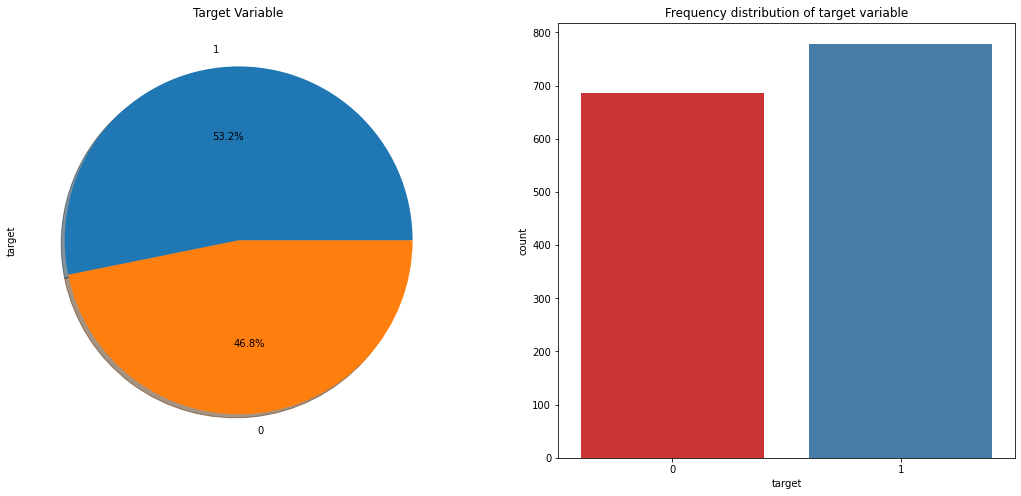

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['target'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Variable')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="target", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of target variable")

plt.show()

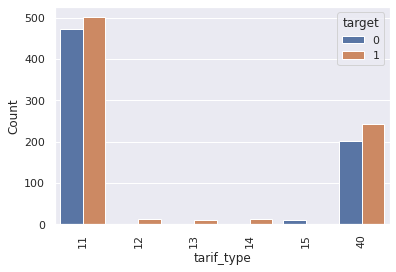

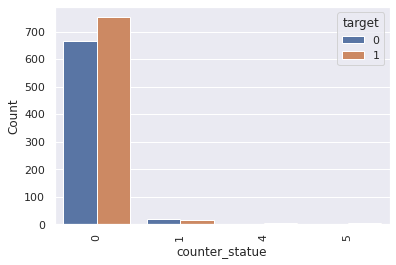

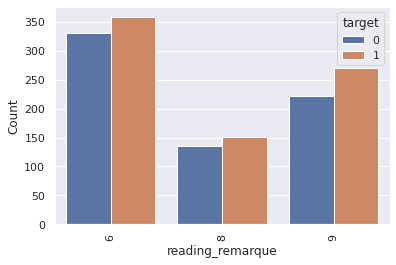

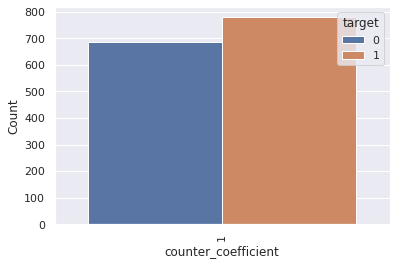

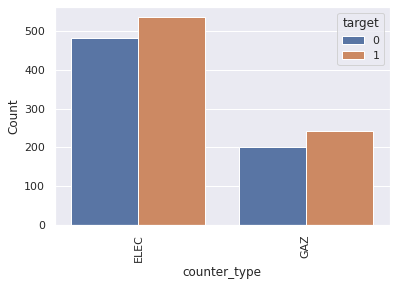

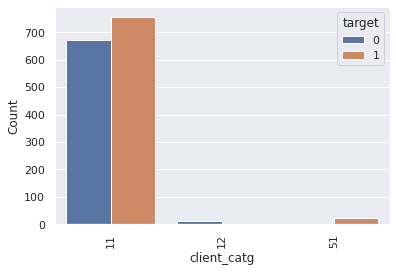

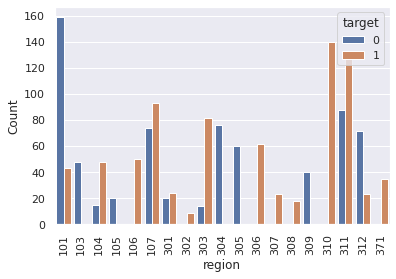

In [ ]:
sns.set_theme(style="darkgrid")
for feature in categorical_variable:
    data=df.copy()
    sns.countplot(x=feature, hue='target',data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
    

In [ ]:
numeric_feature=[feature for feature in df.columns if feature not in categorical_variable and feature!='target']

In [ ]:
numeric_feature

['counter_code',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number']

In [ ]:
dis_feature=[feature for feature in numeric_feature if len(df[feature].unique())<=25 ]

In [ ]:
cont_features=[feature for feature in numeric_feature if feature not in dis_feature]

In [ ]:
cont_features

['consommation_level_1', 'consommation_level_2', 'consommation_level_3']

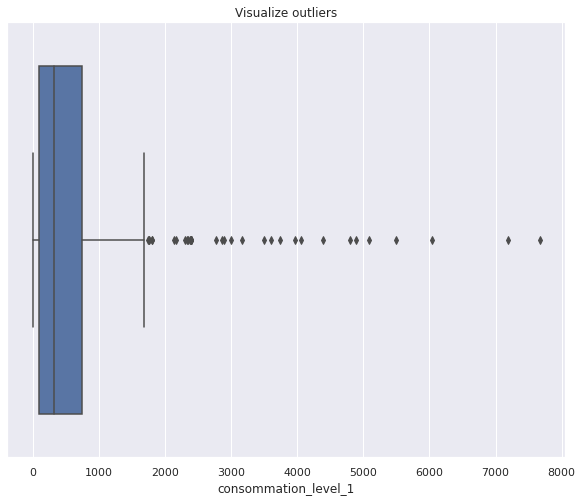

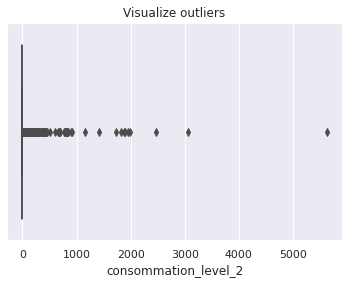

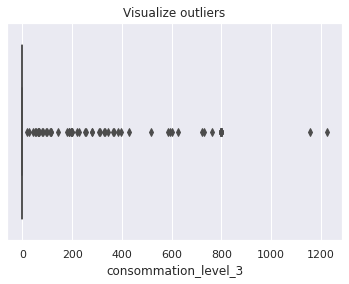

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
for i in cont_features:
    
    ax = sns.boxplot(x=df[i])
    plt.xlabel(i)
    ax.set_title("Visualize outliers")
    plt.show()

In [ ]:
dis_feature

['counter_code', 'consommation_level_4', 'months_number']

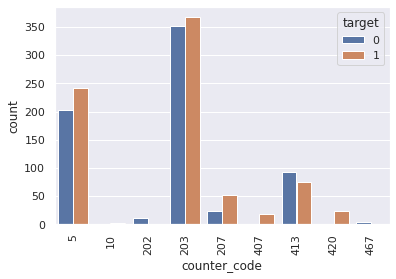

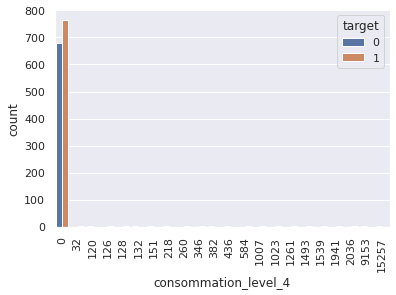

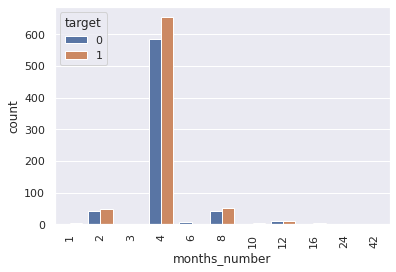

In [ ]:
for feature in dis_feature:
    d=df.copy()
    sns.countplot(x=feature, hue="target", data=df)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.show()

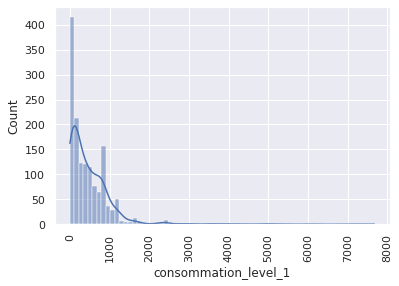

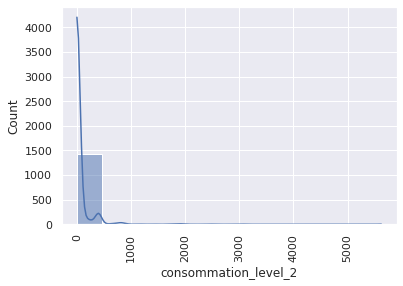

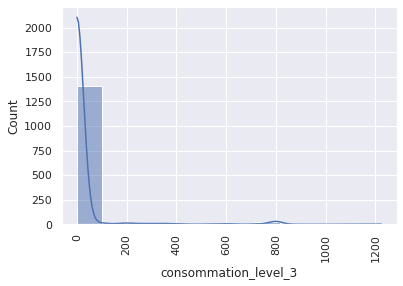

In [ ]:
for feature in cont_features:
    d=df.copy()
    sns.histplot(x=feature, data=df,kde=True)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.show()

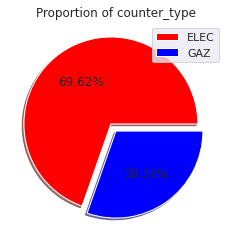

In [ ]:
sizes_gender = df['counter_type'].value_counts()    
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',explode=[0.1,0],shadow=True, colors=['red', 'blue'])
plt.legend(sizes_gender.index.values)
plt.title('Proportion of counter_type')
plt.show()

In [ ]:
categorical_variable

['tarif_type',
 'counter_statue',
 'reading_remarque',
 'counter_coefficient',
 'counter_type',
 'client_catg',
 'region']

In [ ]:
# Creating Dummies
col = ['tarif_type', 'counter_statue', 'reading_remarque', 'counter_coefficient', 'counter_type', 'client_catg', 'region']
df2 = pd.get_dummies(df, columns = col, drop_first=True)
df2.head()
df2.shape

(1465, 38)

In [ ]:
import statsmodels.api as sm

corr_matrix = sm.add_constant((df2.drop('target', axis = 1))).corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= 0.95) and i != j:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.index[j]} have a correlation of {corr_matrix.iloc[i, j]}" ) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


counter_type_GAZ and tarif_type_40 have a correlation of 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

y = df2['target']
x = df2.drop(['target', 'tarif_type_40'], axis = 1)


In [ ]:
df2.head()

,counter_code,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,target,tarif_type_12,tarif_type_13,tarif_type_14,tarif_type_15,tarif_type_40,counter_statue_1,counter_statue_4,counter_statue_5,reading_remarque_8,reading_remarque_9,counter_type_GAZ,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,region_301,region_302,region_303,region_304,region_305,region_306,region_307,region_308,region_309,region_310,region_311,region_312,region_371
0,203,781,0,0,0,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,203,382,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,203,373,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,203,328,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,203,703,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.head()

,counter_code,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,tarif_type_12,tarif_type_13,tarif_type_14,tarif_type_15,counter_statue_1,counter_statue_4,counter_statue_5,reading_remarque_8,reading_remarque_9,counter_type_GAZ,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,region_301,region_302,region_303,region_304,region_305,region_306,region_307,region_308,region_309,region_310,region_311,region_312,region_371
333,203,401,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,5,95,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1052,5,193,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1099,203,1809,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
61,203,800,39,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


In [ ]:
print(pd.DataFrame(x_train_s).columns)

RangeIndex(start=0, stop=36, step=1)


Variance ratio of each pc:
 [7.98757028e-02 6.13900530e-02 4.76351607e-02 4.29126341e-02
 4.08479131e-02 4.02755094e-02 3.70489602e-02 3.64585235e-02
 3.57105677e-02 3.35675349e-02 3.12573334e-02 3.08415329e-02
 3.06460795e-02 2.96487143e-02 2.93277465e-02 2.90134841e-02
 2.89478796e-02 2.88075117e-02 2.81627644e-02 2.80839058e-02
 2.72303382e-02 2.67147566e-02 2.48831545e-02 2.44429847e-02
 2.19374008e-02 1.99642263e-02 1.97694564e-02 1.87418103e-02
 1.57976183e-02 1.51002545e-02 1.34639001e-02 9.47639440e-03
 6.40619029e-03 3.89385762e-03 1.71814548e-03 1.57527048e-32] 

Explained variance of each pc:
 [2.87798092e+00 2.21192922e+00 1.71633023e+00 1.54617409e+00
 1.47178066e+00 1.45115653e+00 1.33490156e+00 1.31362769e+00
 1.28667829e+00 1.20946322e+00 1.12622494e+00 1.11124334e+00
 1.10420101e+00 1.06826521e+00 1.05670049e+00 1.04537739e+00
 1.04301361e+00 1.03795605e+00 1.01472532e+00 1.01188399e+00
 9.81129316e-01 9.62552527e-01 8.96558544e-01 8.80698898e-01
 7.90420851e-01 7.1932

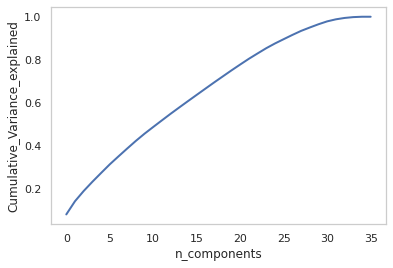

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_s)
print('Variance ratio of each pc:\n', pca.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca.explained_variance_, '\n')
print('Selected {} pcs'.format(pca.n_components_))
print('Original dataset shape: ', df2.shape)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [ ]:
 
pca.n_components=36

# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('n_components= %d,   variance=%f\n' %(index,np.round(var,3)))

n_components= 0,   variance=7.990000

n_components= 1,   variance=14.130000

n_components= 2,   variance=18.890000

n_components= 3,   variance=23.180000

n_components= 4,   variance=27.270000

n_components= 5,   variance=31.290000

n_components= 6,   variance=35.000000

n_components= 7,   variance=38.640000

n_components= 8,   variance=42.220000

n_components= 9,   variance=45.570000

n_components= 10,   variance=48.700000

n_components= 11,   variance=51.780000

n_components= 12,   variance=54.850000

n_components= 13,   variance=57.810000

n_components= 14,   variance=60.740000

n_components= 15,   variance=63.650000

n_components= 16,   variance=66.540000

n_components= 17,   variance=69.420000

n_components= 18,   variance=72.240000

n_components= 19,   variance=75.050000

n_components= 20,   variance=77.770000

n_components= 21,   variance=80.440000

n_components= 22,   variance=82.930000

n_components= 23,   variance=85.370000

n_components= 24,   variance=87.570000

n_component

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
#pca.fit(x_train_s)
print('Variance ratio of each pc:\n', pca.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca.explained_variance_, '\n')
print('Selected {} pcs'.format(pca.n_components_))
print('Original dataset shape: ', df2.shape)

AttributeError: ignored

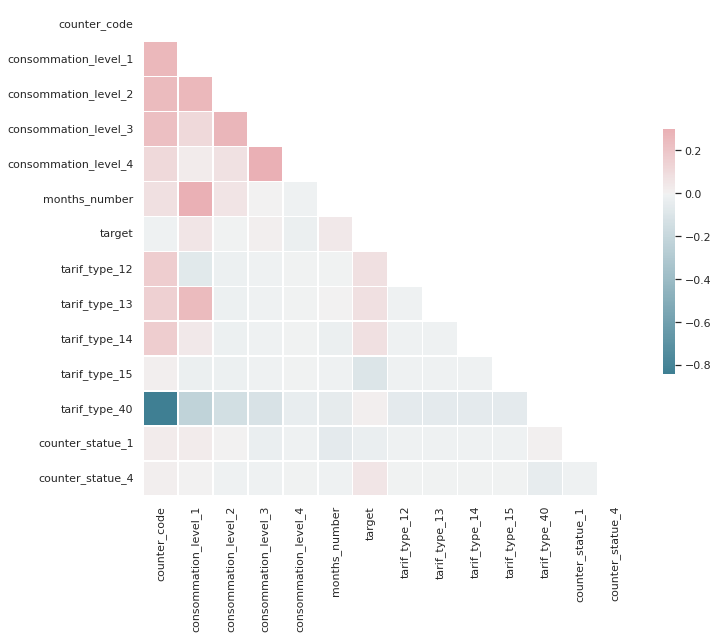

In [ ]:
import numpy as np
sns.set(style = 'whitegrid')

corr = df2.iloc[:, :14].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

LG without PCA

In [ ]:
#x_train_pca = pca.transform(x_train_s)
#x_test_pca = pca.transform(x_test_s)

lg = LogisticRegression(C = 1000, solver = 'lbfgs', max_iter = 1000)
lg.fit(x_train_s, y_train)

y_predict_test = lg.predict(x_test_s)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print("Logistic Regression Model")
print('Precision Score: ', round(precision_score(y_test,y_predict_test), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_predict_test), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_predict_test), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_predict_test), 2)*100)
print('ROC AUC: ', roc_auc_score(y_test,y_predict_test))
print('classification report:\n', classification_report(y_test, y_predict_test))

Logistic Regression Model
Precision Score:  83.0
Recall Score:  89.0
F1 Score:  86.0
Accuracy Score:  84.0
ROC AUC:  0.8387951242381622
classification report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       135
           1       0.83      0.89      0.86       158

    accuracy                           0.84       293
   macro avg       0.85      0.84      0.84       293
weighted avg       0.84      0.84      0.84       293



LG with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

pipeline = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('lg', LogisticRegression(solver ='lbfgs', max_iter = 5000))])

param_grid = {
  'lg__C': [1000, 100, 10, 1, 0.1, 0.01],
  'pca__n_components':  [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
}
# using cross validation we get grid
grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'roc_auc', refit=True, verbose=1)
grid_fit = grid.fit(x_train, y_train)
pipeline.get_params().keys()

Fitting 5 folds for each of 126 candidates, totalling 630 fits


dict_keys(['memory', 'steps', 'verbose', 'standardization', 'pca', 'lg', 'standardization__copy', 'standardization__with_mean', 'standardization__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'lg__C', 'lg__class_weight', 'lg__dual', 'lg__fit_intercept', 'lg__intercept_scaling', 'lg__l1_ratio', 'lg__max_iter', 'lg__multi_class', 'lg__n_jobs', 'lg__penalty', 'lg__random_state', 'lg__solver', 'lg__tol', 'lg__verbose', 'lg__warm_start'])

In [ ]:
grid.best_estimator_

Pipeline(steps=[('standardization', StandardScaler()),
                ('pca', PCA(n_components=30)),
                ('lg', LogisticRegression(C=1000, max_iter=5000))])

In [ ]:
y_grid_p=grid.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print("Logistic Regression Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_grid_p), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_grid_p), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_grid_p), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_grid_p), 2)*100)
print('ROC AUC: ', roc_auc_score(y_test,y_grid_p))
print('classification report:\n', classification_report(y_test, y_grid_p))

Logistic Regression Model with best parameters
Precision Score:  83.0
Recall Score:  90.0
F1 Score:  86.0
Accuracy Score:  85.0
ROC AUC:  0.8419596812001876
classification report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.82       135
           1       0.83      0.90      0.86       158

    accuracy                           0.85       293
   macro avg       0.85      0.84      0.84       293
weighted avg       0.85      0.85      0.85       293



In [ ]:
x_train_s[0:1]

array([[ 0.21980158, -0.12357111, -0.215557  , -0.18962739, -0.05936321,
        -0.18074299, -0.10170953, -0.09276773, -0.09276773, -0.08796935,
        -0.17021393, -0.05852057, -0.05065862,  2.05155767, -0.70891756,
        -0.67118928, -0.09733751, -0.13507407, -0.19039723, -0.20439613,
        -0.12489163, -0.19279041,  2.73728947, -0.17801725, -0.08290267,
        -0.2651785 , -0.24033671, -0.20439613, -0.21110017, -0.11764706,
        -0.10170953, -0.16754156, -0.33617026, -0.40192796, -0.25394257,
        -0.16754156]])

In [ ]:


from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
min1, max1 = x_train_s[0: 1].min()-1, x_train_s[0: 1].max()+1
min2, max2 = x_train_s[1: 2].min()-1, x_train_s[1: 2].max()+1
x1grid = arange(min1, max1, 5)
x2grid = arange(min2, max2, 5)
xx, yy = meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid_graph = hstack((r1,r2))
zz = y_grid_p.reshape(xx.shape)
pyplot.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
	row_ix = where(y_train == class_value)
	pyplot.scatter(x_train_s[ row_ix, 1], x_train_s[ row_ix, 2], cmap='Paired')

ValueError: ignored

DT without PCA

In [ ]:


# Decision Tree Classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_s, y_train)

In [ ]:
y_pred=clf.predict(x_test_s)

In [ ]:
print("Decision Tree  Model")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ',roc_auc_score(y_test,y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

Decision Tree  Model
Precision Score:  91.0
Recall Score:  87.0
F1 Score:  89.0
Accuracy Score:  89.0
ROC AUC:  0.8885607126113455
classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       135
           1       0.91      0.87      0.89       158

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.89       293
weighted avg       0.89      0.89      0.89       293



DT with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('dt', DecisionTreeClassifier())])


In [ ]:
params = {
    'dt__max_depth': [2, 3, 5, 10, 20],
    'dt__min_samples_leaf': [5, 10, 20, 50, 100],
    'dt__criterion': ["gini", "entropy"],
    'pca__n_components':  [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
}

In [ ]:
grid_search = GridSearchCV(pipeline, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardization', 'pca', 'dt', 'standardization__copy', 'standardization__with_mean', 'standardization__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__random_state', 'dt__splitter'])

In [ ]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardization', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 3, 5, 10, 20],
                         'dt__min_samples_leaf': [5, 10, 20, 50, 100],
                         'pca__n_components': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29, 30]},
             scoring='roc_auc', verbose=1)

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('standardization', StandardScaler()),
                ('pca', PCA(n_components=28)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        min_samples_leaf=10))])

In [ ]:
y_pred=grid_search.predict(x_test)

In [ ]:
print("Decision Tree Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', roc_auc_score(y_test,y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

Decision Tree Model with best parameters
Precision Score:  87.0
Recall Score:  84.0
F1 Score:  85.0
Accuracy Score:  85.0
ROC AUC:  0.8473511486169714
classification report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       135
           1       0.87      0.84      0.85       158

    accuracy                           0.85       293
   macro avg       0.85      0.85      0.85       293
weighted avg       0.85      0.85      0.85       293



RF without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with doors variable removed : 91.1263


In [ ]:
print("Random Forest Model ")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', roc_auc_score(y_test,y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

Random Forest Model 
Precision Score:  92.0
Recall Score:  91.0
F1 Score:  92.0
Accuracy Score:  91.0
ROC AUC:  0.911251758087201
classification report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       135
           1       0.92      0.91      0.92       158

    accuracy                           0.91       293
   macro avg       0.91      0.91      0.91       293
weighted avg       0.91      0.91      0.91       293



RF with PCA

In [ ]:
pipeline = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('rf', RandomForestClassifier())])

In [ ]:
forest_params = [{'rf__max_depth': list(range(10, 15)), 
                  'rf__max_features': list(range(0,14)), 
                  'pca__n_components':  [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}]

clf = GridSearchCV(pipeline, forest_params, cv = 5, scoring='roc_auc', n_jobs = -1)

clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
675 fits failed out of a total of 7350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardization', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'pca__n_components': [10, 11, 12, 13, 14, 15, 16, 17,
                                                18, 19, 20, 21, 22, 23, 24, 25,
                                                26, 27, 28, 29, 30],
                          'rf__max_depth': [10, 11, 12, 13, 14],
                          'rf__max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13]}],
             scoring='roc_auc')

In [ ]:
clf.best_estimator_

Pipeline(steps=[('standardization', StandardScaler()),
                ('pca', PCA(n_components=19)),
                ('rf', RandomForestClassifier(max_depth=14, max_features=1))])

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print("Random Forest Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', roc_auc_score(y_test,y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

Random Forest Model with best parameters
Precision Score:  91.0
Recall Score:  92.0
F1 Score:  92.0
Accuracy Score:  91.0
ROC AUC:  0.9101734646038443
classification report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       135
           1       0.91      0.92      0.92       158

    accuracy                           0.91       293
   macro avg       0.91      0.91      0.91       293
weighted avg       0.91      0.91      0.91       293

